<img src="img/dog-rates-social.png" alt="Drawing" style="width: 800px;"/>



# Project: Wrangling and Analyze Data-[WeRateDogs Tweet Data Wrangling]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#anaviz">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>**Présentation**: WeRateDogs est un compte Twitter qui évalue les chiens des gens avec un commentaire humoristique sur le chien. Le compte a été lancé en 2015 par l'étudiant Matt Nelson et a attiré l'attention des médias internationaux. Il partage des images de chiens et rédige un bref panégyrique sur le chien, puis laisse ses abonnés le noter en le mettant en favori. En demandant à WeRateDogs de partager avec nous certains de leurs tweets, ils l'ont fait. Ils ont partagé plus de 5000 de leurs tweets qui contiennent des données de base. Parfois, dans leur bref panégyrique, ils mentionnent la race du chien, et d'autres noms. Mais grâce à Udacity, ils ont effectué des procédures pour classer les chiens en fonction de leurs images partagées avec les tweets.

>**Motivation du projet**: Exploiter les données Twitter de WeRateDogs pour créer des analyses et des visualisations intéressantes et fiables. Les archives Twitter sont excellentes, mais elles ne contiennent que des informations très basiques sur les tweets. Une collecte supplémentaire, puis une évaluation et un nettoyage sont nécessaires pour des analyses et des visualisations « Wow ! »-dignes.

>**Données**: Dans le cadre de ce projet, nous travaillerons sur les trois ensembles de données suivants : <br>
> * **Archives Twitter améliorées**: Les archives Twitter de WeRateDogs contiennent des données de base sur les 5 000 tweets et plus, mais pas sur tout. Une colonne de l’archive contient cependant : le texte de chaque tweet, qui peut être utilisé pour extraire la note, le nom du chien et les « étapes » du chien (cest-à-dire doggo, floofer, pupper et puppo) pour rendre cette archive Twitter « améliorée ».
> * **Données supplémentaires via l’API Twitter**: Revenons à l’aspect basique des archives Twitter : le nombre de retweets et le nombre de favoris sont deux des omissions notables de la colonne. Heureusement, ces données supplémentaires peuvent être collectées par n’importe qui à partir de l’API de Twitter. Enfin, « n'importe qui » ayant accès aux données des 3 000 tweets les plus récents, du moins.
> * **Fichier de prédictions d’images**: Autre chose intéressante : sont lancées toutes les images dans les archives Twitter de WeRateDogs à travers un réseau neural network capable de classer les races de chiens*. Les résultats : un tableau rempli de prédictions d’images (les trois premières seulement) avec l’ID de chaque tweet, l’URL de l’image et le numéro de l’image correspondant à la prédiction la plus sûre (numérotée de 1 à 4 puisque les tweets peuvent contenir jusqu’à quatre images).<br>

>**Données externes** : Une **quatrième base de données** sera collectée sur wikipédia pour récupérer le nom complet des langues de tweet en utilisant le **web scraping** à partir d' [ici](https://fr.wikipedia.org/wiki/Liste_des_codes_ISO_639-1).


### Importation des librairies necessaires

In [584]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
from timeit import default_timer as timer
import json
import re
import missingno as msno
import seaborn as sns
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

<a id='gathering'></a>
## Data Gathering
Dans la cellule ci-dessous, nous rassemblons **les quatres** données pour ce projet et les chargeons dans le bloc-notes. <br> **Remarque :** les méthodes requises pour recueillir chaque donnée sont différentes.

<hr>
1. Téléchargement directe des données d'archive Twitter de WeRateDogs (twitter_archive_enhanced.csv)

In [585]:
archive_df = pd.read_csv("datasets/twitter-archive-enhanced.csv")
archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<hr>
2. Nous utilisons ici la bibliothèque **Requests** pour télécharger la prédiction d'image de tweet (image_predictions.tsv)

In [586]:
#URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
#response = requests.get(URL)
#open("datasets/image-predictions.tsv", "wb").write(response.content)

In [587]:
pred_df = pd.read_csv("datasets/image-predictions.tsv", sep='\t')
pred_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<hr>
3. Nous utilisez la bibliothèque Tweepy pour interroger des données supplémentaires via l'API Twitter (tweet_json.txt)

In [588]:
bearer_token = '*****'
consumer_key = '*****'
consumer_secret = '*****'
access_token = '*****'
access_secret = '*****'

In [589]:
#auth = tweepy.client(bearer_token=bearer_token,consumer_key =consumer_key, consumer_secret =consumer_secret,
#                     access_token = access_token, access_token_secret = access_secret)
#
#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [590]:
#for tweet_id in archive_df.tweet_id:
#   try:
#        tweet_json = api.get_status(tweet_id, tweet_mode = 'extented')
#        with open('datasets/tweet_json.txt', mode='a') as file:
#        json.dump(tweet_json, file)
#            file.write('\n')
#    except Exception as e:
#        pass

In [591]:
# Liste vide pour stocker les dictionaries qui seront créés
lists = [] 
# Liste des colonnes sélectionnés pour les tweets
#mycolumns = ['id','full_text','retweet_count','is_quote_status','favorite_count','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable']
with open('datasets/tweet_json.txt') as file:
    lines = file.read().splitlines()
    for line in lines:
        data = json.loads(line)
        lists.append(data)
tweet_df = pd.DataFrame(lists)#,columns=mycolumns)

In [592]:
tweet_df.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


<hr>
4. Nous utilisons beautifulsoup ici, un client http python pour collecter les données sur la page wikipédia (webscraping) des langues.

In [593]:
# Obtenir la réponse sous forme de html
wikiurl="https://fr.wikipedia.org/wiki/Liste_des_codes_ISO_639-1"
table_class = 'wikitable sortable alternance jquery-tablesorter' # la class du tableau qui contient les données de langues
response=requests.get(wikiurl) # reponse de la requete http
print(response.status_code) # Vérifier si le code marche (code 200)

200


In [594]:
# Analyser les données du HTML dans un objet beautifulsoup
soup = BeautifulSoup(response.text, 'html.parser') # parser le html pour le manipuler en objet
langtable=soup.find('table',{'class':"wikitable"})

In [595]:
# Stocker le tableau dans pandas dataframe
lang_df = pd.read_html(str(langtable))

# Convertir list en dataframe
lang_df=pd.DataFrame(lang_df[0])
lang_df.head(10)

,639-1,639-2,639-3,Nom de la langue,Nom(dans la langue correspondante),Nom en anglais,Commentaire
0,aa,aar,aar,Afar,Afaraf,Afar,NaN
1,ab,abk,abk,Abkhaze,Аҧсуа,Abkhazian,NaN
2,ae,ave,ave,Avestique,Avesta,Avestan,NaN
3,af,afr,afr,Afrikaans,Afrikaans,Afrikaans,NaN
4,ak,aka,aka + 2,Akan,Akan,Akan,NaN
5,am,amh,amh,Amharique,አማርኛ,Amharic,NaN
6,an,arg,arg,Aragonais,Aragonés,Aragonese,NaN
7,ar,ara,ara + 30,Arabe,العربية,Arabic,L'arabe standard est arb en ISO 639-3
8,as,asm,asm,Assamais,অসমীয়া,Assamese,NaN
9,av,ava,ava,Avar,авар мацӀ ; магӀарул мацӀ,Avaric,NaN


<a id="assess"></a>
## Assessing Data
Dans cette section, détectont documentez au moins **huit (8) problèmes de qualité et deux (2) problèmes d'ordre**. Vous devez utiliser **les deux** évaluation visuelle
évaluation programmatique pour évaluer les données.

**Remarque :** faites attention aux points clés suivants lorsque vous accédez aux données.

* Vous ne voulez que des notes originales (pas de retweets) qui ont des images. Bien qu'il y ait plus de 5000 tweets dans l'ensemble de données, tous ne sont pas des évaluations de chiens et certains sont des retweets.
* L'évaluation et le nettoyage complet de l'ensemble de données prendraient beaucoup de temps et il n'est pas nécessaire de pratiquer et de démontrer vos compétences en matière de traitement des données. Par conséquent, les exigences de ce projet consistent uniquement à évaluer et à éliminer au moins 8 problèmes de qualité et au moins 2 problèmes d'ordre dans cet ensemble de données.
* Le fait que les numérateurs de notation soient supérieurs aux dénominateurs n'a pas besoin d'être nettoyé. Ce [système de notation unique] (http://knowyourmeme.com/memes/theyre-good-dogs-brent) est une grande partie de la popularité de WeRateDogs.
* Vous n'avez pas besoin de collecter les tweets au-delà du 1er août 2017. Vous le pouvez, mais notez que vous ne pourrez pas collecter les prédictions d'images pour ces tweets puisque vous n'avez pas accès à l'algorithme utilisé.

#### Visual Assessment / Évaluation visuelle
Nous allons ici lancer arbitraire un échantillon de 100 observations de nos trois bases pour avoir un aperçu sur leurs compositions.

In [596]:
archive_df.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
726,782598640137187329,NaN,NaN,2016-10-02 15:10:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timmy. He's quite large. According to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782598640...,11,10,Timmy,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None
718,783466772167098368,NaN,NaN,2016-10-05 00:40:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He likes eavesdropping from fili...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783466772...,11,10,Finn,None,None,None,None
242,846153765933735936,NaN,NaN,2017-03-27 00:15:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vixen. He really likes bananas. Steals...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846153765...,13,10,Vixen,None,None,None,None
1818,676593408224403456,NaN,NaN,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,11,10,None,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,847962785489326080,NaN,NaN,2017-04-01 00:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,None,None,None,None
2308,666817836334096384,NaN,NaN,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He is a German Boston Shuttlecoc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666817836...,9,10,Jeph,None,None,None,None
708,785264754247995392,NaN,NaN,2016-10-09 23:44:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He requested to be carried around...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785264754...,12,10,Doc,None,None,None,None
1776,677961670166224897,NaN,NaN,2015-12-18 21:20:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Izzy. She's showing off the dance move...,NaN,NaN,NaN,https://vine.co/v/iKuMDuYV0aZ,11,10,Izzy,None,None,None,None


In [597]:
pred_df.sample(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1187,739485634323156992,https://pbs.twimg.com/media/CkMuP7SWkAAD-2R.jpg,2,Walker_hound,0.640256,True,English_foxhound,0.229799,True,beagle,0.037754,True
468,675109292475830276,https://pbs.twimg.com/media/CV54UQTXAAAGf-j.jpg,1,dalmatian,0.989519,True,English_setter,0.005258,True,German_short-haired_pointer,0.001443,True
77,667437278097252352,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False
286,671151324042559489,https://pbs.twimg.com/media/CVBokRSWsAADuXx.jpg,1,Rottweiler,0.781201,True,black-and-tan_coonhound,0.061206,True,kelpie,0.048856,True
1083,718460005985447936,https://pbs.twimg.com/media/Cfh7j6CWQAAndTd.jpg,1,badger,0.356946,False,Boston_bull,0.252781,True,kelpie,0.113433,True
...,...,...,...,...,...,...,...,...,...,...,...,...
249,670679630144274432,https://pbs.twimg.com/media/CU67jGSUkAAk_1Y.jpg,1,Ibizan_hound,0.342734,True,Brittany_spaniel,0.229065,True,Chihuahua,0.104029,True
664,682697186228989953,https://pbs.twimg.com/media/CXltdtaWYAIuX_V.jpg,1,bald_eagle,0.097232,False,torch,0.096621,False,cliff,0.090385,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,0.114071,False,common_iguana,0.043255,False
1562,793500921481273345,https://pbs.twimg.com/media/CwMU34YWIAAz1nU.jpg,2,golden_retriever,0.326122,True,Labrador_retriever,0.219904,True,Chesapeake_Bay_retriever,0.163366,True


In [598]:
tweet_df.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2099,Sat Nov 28 19:51:59 +0000 2015,670691627984359425,670691627984359425,This is Ester. He has a cocaine problem. This ...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670691622141583360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,632,False,False,False,False,en,NaN,NaN,NaN,NaN
2260,Fri Nov 20 03:35:20 +0000 2015,667546741521195010,667546741521195010,Here is George. George took a selfie of his ne...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667546741093330944, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,355,False,False,False,False,en,NaN,NaN,NaN,NaN
88,Wed Jun 14 16:04:48 +0000 2017,875021211251597312,875021211251597312,Guys please stop sending pictures without any ...,False,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 875021140921417728, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,26022,False,False,False,False,en,NaN,NaN,NaN,NaN
1581,Wed Jan 13 02:43:46 +0000 2016,687102708889812993,687102708889812993,Army of water dogs here. None of them know whe...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 687102703005265921, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2571,False,False,False,False,en,NaN,NaN,NaN,NaN
746,Sun Sep 25 00:06:08 +0000 2016,779834332596887552,779834332596887552,This is Scout. He really wants to kiss himself...,False,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 779834320894713856, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,21252,False,False,False,False,en,NaN,NaN,NaN,NaN
645,Mon Oct 31 18:00:14 +0000 2016,793150605191548928,793150605191548928,This is Nida. She's a free elf. Waited so long...,False,"[0, 66]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 793150552360284160, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,6909,False,False,False,False,en,NaN,NaN,NaN,NaN
1153,Tue Apr 26 15:29:30 +0000 2016,724983749226668032,724983749226668032,This is Fred-Rick. He dabbles in parkour. The ...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 724983740980690944, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4040,False,False,False,False,en,NaN,NaN,NaN,NaN
792,Wed Sep 07 15:44:53 +0000 2016,773547596996571136,773547596996571136,This is Chelsea. She forgot how to dog. 11/10 ...,False,"[0, 68]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 773547591439122432, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,24553,False,False,False,False,en,NaN,NaN,NaN,NaN
1191,Wed Apr 06 02:21:30 +0000 2016,717537687239008257,717537687239008257,People please. This is a Deadly Mediterranean ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 717537679412486144, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,6281,False,False,False,False,en,NaN,NaN,NaN,NaN
1285,Fri Mar 11 18:18:36 +0000 2016,708356463048204288,708356463048204288,This is Oliver. That is his castle. He protect...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 708356456928649216, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3929,False,False,False,False,en,NaN,NaN,NaN,NaN


Nous utilisons ici la librairie *missingno* pour observer les valeurs manquantes dans nos données.

<AxesSubplot: >

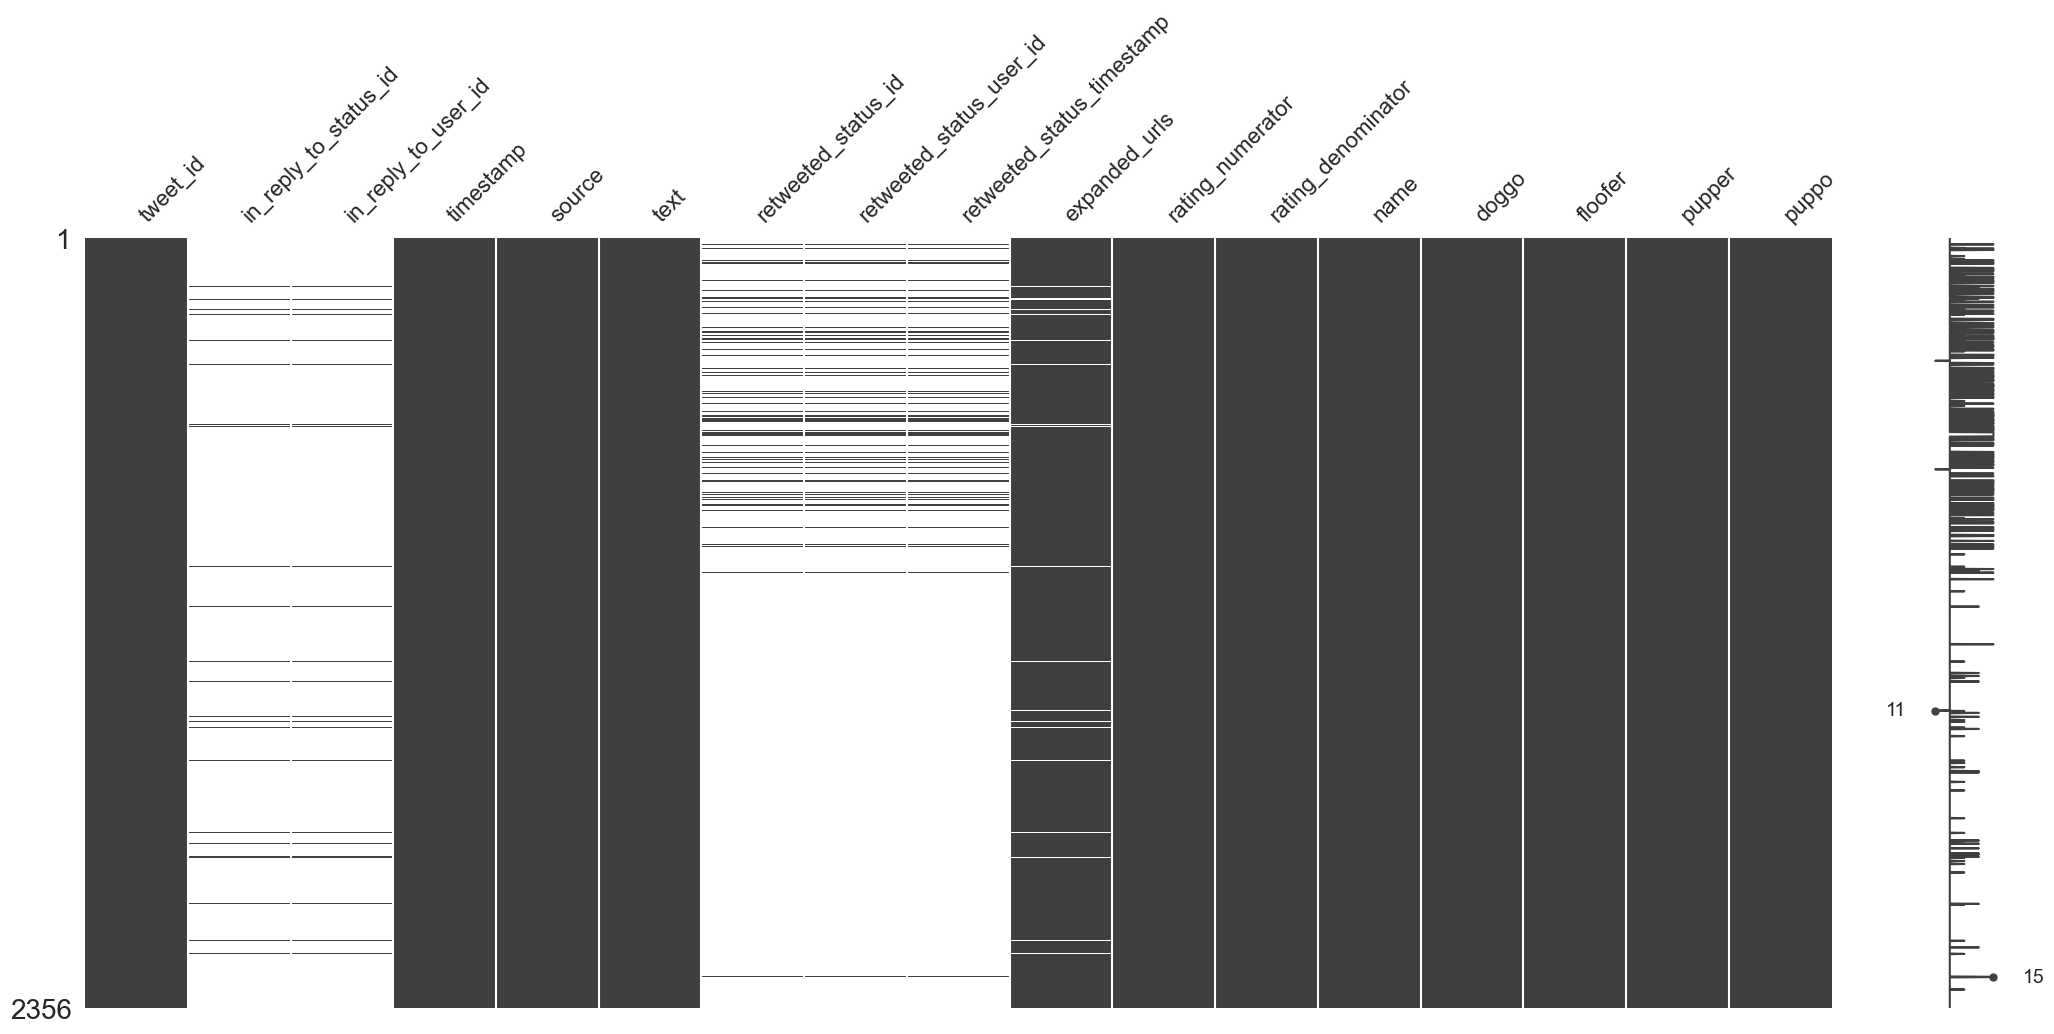

In [599]:
# Visualiser les valeurs manquantes avec une matrice
msno.matrix(archive_df)

<AxesSubplot: >

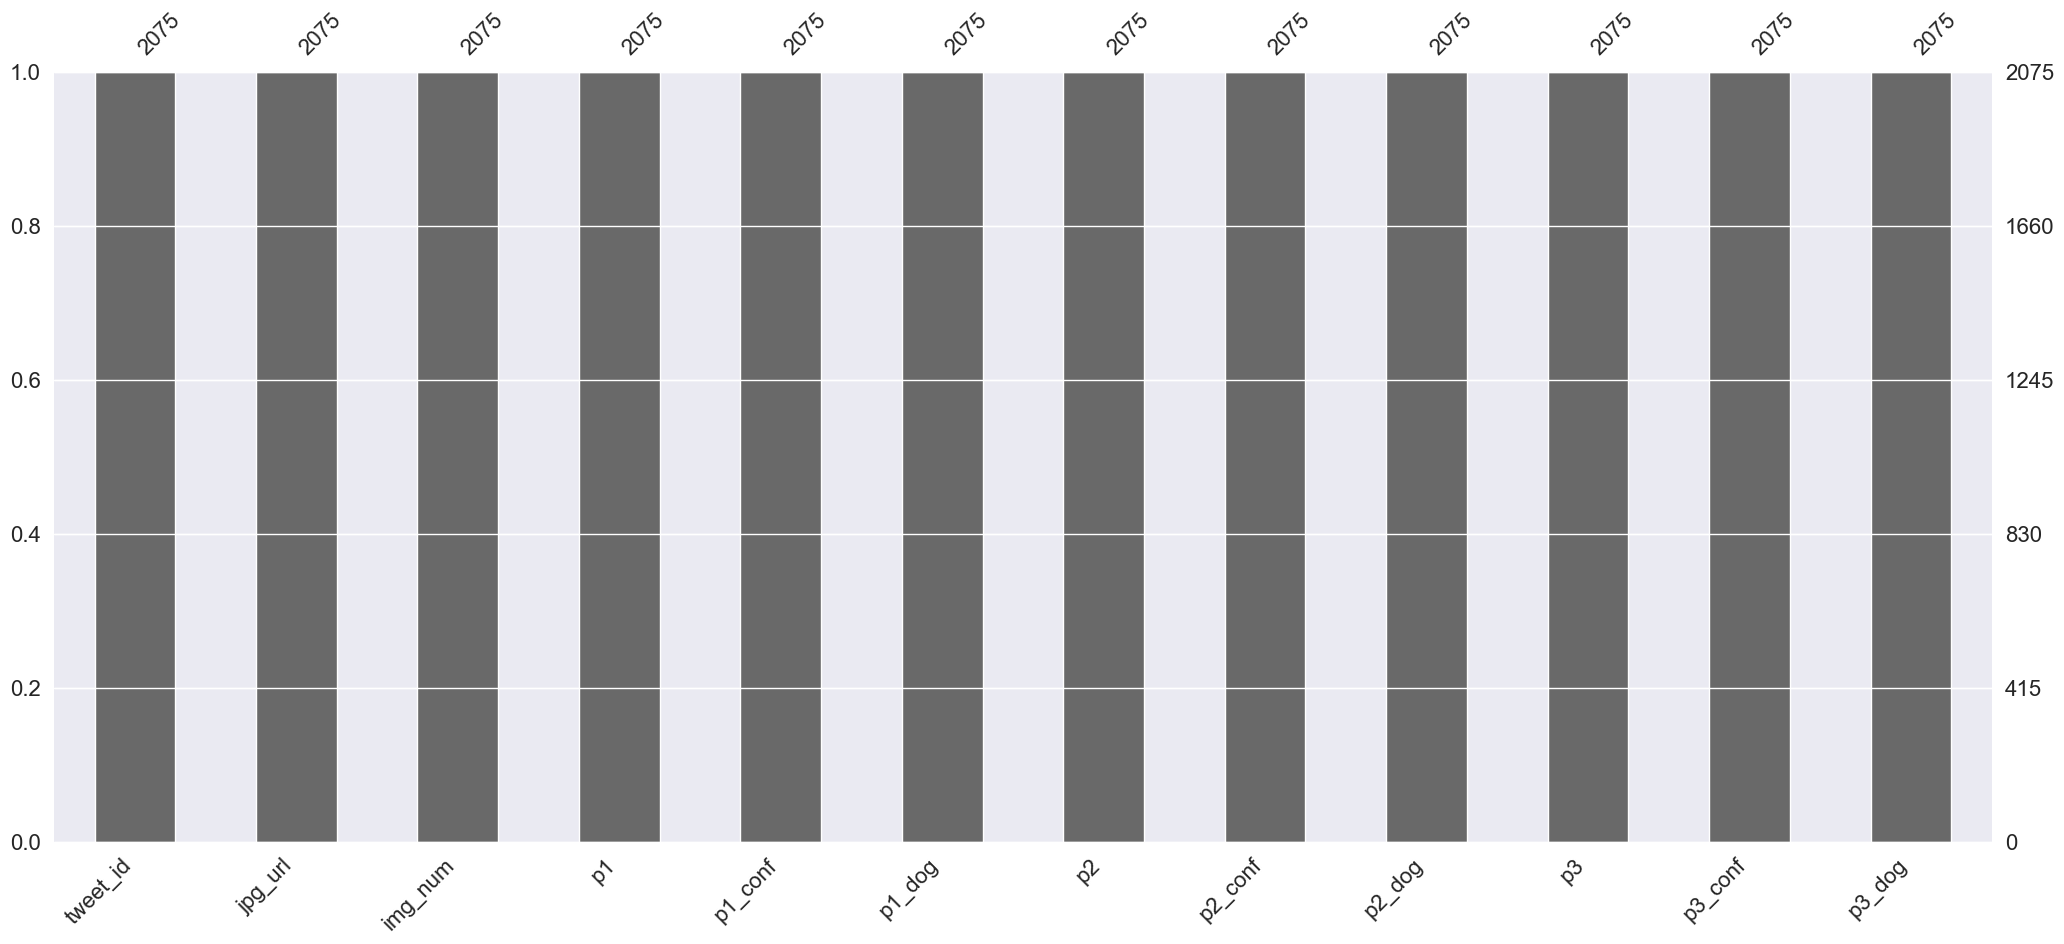

In [600]:
# Visualisation des valeurs manquantes avec un graphique en barres
msno.bar(pred_df)

<AxesSubplot: >

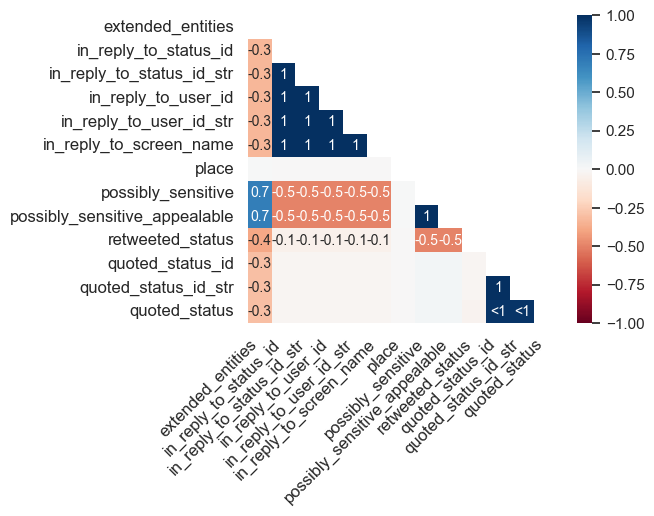

In [601]:
# Visualisation de la corrélation entre le nombre de valeurs manquantes dans différentes colonnes sous forme de carte thermique
msno.heatmap(tweet_df, figsize=(5,4), fontsize=12)

<AxesSubplot: >

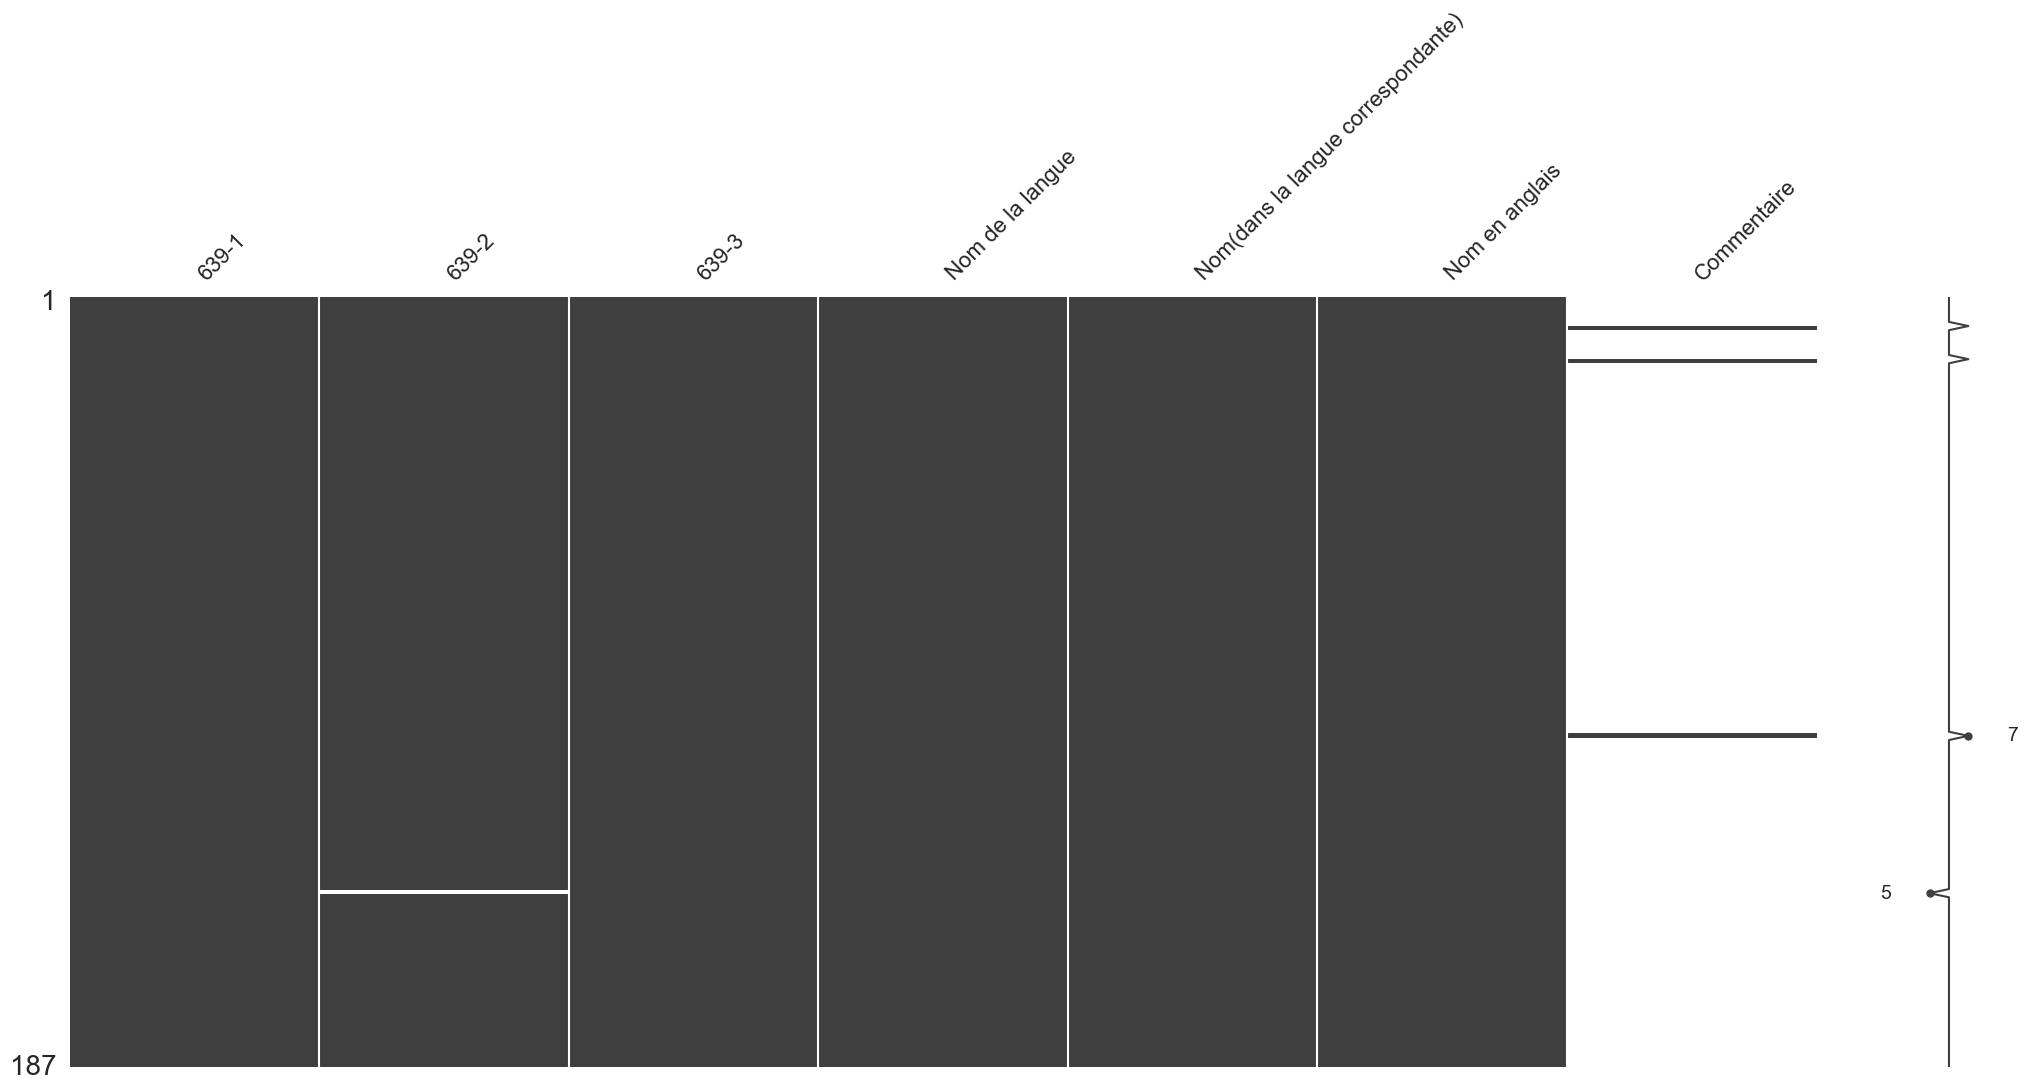

In [602]:
msno.matrix(lang_df)

#### Programmatic Assessment / Évaluation programmatique
Dans cette partie nous procédons à l'évaluation par bouts de code pour dénicher les problèmes liés à nos données.

- `archive_df`

In [603]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Problème 1** :
Par le visuel et le code on constate que :
* Le type de la variable `timestamp` n'est pas adéquat pour déterminer le temps.*
* Nos trois variables `retweeted_status_*` et deux variables `in_reply_to_*` sont quasis vides donc n'apportent presque pas d'information à l'étude. Doivent normalement être écarté de l'étude.*
* `expanded_urls` contient aussi d'importantes valeurs manquantes mais pas autant que les dernières variables citées.*

**Par ailleurs** : 
* Les variables `rating_numerator` et `rating_denominator` peuvent faire une seule variable au lieu de deux puisqu'il s'agit d'une note, même si on est en façe d'une notation assez particulière.*
* On ne remarque aussi qu'il n'y a pas de valeurs manquantes pour nos différentes stades de chien, ce qui n'est pas normal car un chien ne peut réunir toutes ces caractéristiques en même temps. Donc de fausses données sont insérées.*

In [604]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [605]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

**Problème 2** : 
* On est en face d'une notation pas du tout régulière, donc  remise en cause.

In [606]:
stades = ['doggo','floofer','pupper','puppo']
for stade in stades :
    print(archive_df[stade].value_counts())
    print('---------------------------------')

None     2259
doggo      97
Name: doggo, dtype: int64
---------------------------------
None       2346
floofer      10
Name: floofer, dtype: int64
---------------------------------
None      2099
pupper     257
Name: pupper, dtype: int64
---------------------------------
None     2326
puppo      30
Name: puppo, dtype: int64
---------------------------------


**Problème 3** : 
* On voit donc qu'en réalité les valeurs supposées vides était remplies par la valeur 'None' au lieu de `None`.

In [607]:
list(archive_df.text)[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

**Problème 4** : 
* Dans la variable `text` on découvre une autre variable cachée qu'est le `lien`.

In [608]:
list(archive_df.source.unique())

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

**Problème 5** : 
* La variable `source` affiche plus que la vraie source essentiel qu'est l'appareil ou le moyen d'acces de Twitter.

In [609]:
list(archive_df.expanded_urls)[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

*Rien d'interessant !*

In [610]:
pd.DataFrame([name for name in list(archive_df.name) if len(name)<=2]).value_counts()

a     55
Bo     9
an     7
Al     1
Ed     1
JD     1
Jo     1
Mo     1
O      1
by     1
my     1
dtype: int64

**Problème 6** : 
* On voit des noms de chiens incorectes comme *a* par exemple répété 55 fois et *an* 7 fois dans le jeu de donnée.
<hr>

- `pred_df`

In [611]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Problème 7** :
* Pas de valeurs manquantes heureusement, mais nous avons 3 prédictions pour une seule image, faudra t-il chosir uniquement donc celle qui a la meilleure prédiction puisque nous ne sommes pas dans une étude d'apprentissage automatique.

In [612]:
pred_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [613]:
pred_df.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

**Problème 8** :
* Le nom des races des chiens doit être redéfini.
<hr>

- `tweet_df`

In [614]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [615]:
list(tweet_df.entities)[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [616]:
list(tweet_df.extended_entities)[0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [617]:
list(tweet_df.user.sample(4))

[{'id': 4196983835,
  'id_str': '4196983835',
  'name': 'WeRateDogs™ (author)',
  'screen_name': 'dog_rates',
  'location': 'DM YOUR DOGS, WE WILL RATE',
  'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',
  'url': 'https://t.co/N7sNNHAEXS',
  'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
      'expanded_url': 'http://weratedogs.com',
      'display_url': 'weratedogs.com',
      'indices': [0, 23]}]},
   'description': {'urls': []}},
  'protected': False,
  'followers_count': 3201006,
  'friends_count': 104,
  'listed_count': 2812,
  'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
  'favourites_count': 114031,
  'utc_offset': None,
  'time_zone': None,
  'geo_enabled': True,
  'verified': True,
  'statuses_count': 5288,
  'lang': 'en',
  'contributors_enabled': False,
  'is_translator': False,
  'is_translation_enabled': False,
  'profile_backgro

In [618]:
tweet_df[tweet_df.possibly_sensitive == tweet_df.possibly_sensitive_appealable].shape

(2211, 31)

**Problème 9** :
* Ce dataset a énormément de valeurs manquantes, contient très probablement des variables inutiles à notre étude etcertaines variables ont des valeurs uniques. 

In [619]:
tweet_df.iloc[:,13:].sample(5)

,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2141,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,65,317,False,False,False,False,en,NaN,NaN,NaN,NaN
1000,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,1116,3243,False,False,False,False,en,NaN,NaN,NaN,NaN
153,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,21840,66437,False,False,False,False,en,NaN,NaN,NaN,NaN
1945,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,638,1532,False,False,False,False,en,NaN,NaN,NaN,NaN
1931,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,340,1208,False,False,False,False,en,NaN,NaN,NaN,NaN


In [620]:
tweet_df[tweet_df['is_quote_status'] == True]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
31,Sat Jul 15 02:45:48 +0000 2017,886054160059072513,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,False,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,886053434075471873,NaN
34,Thu Jul 13 15:19:09 +0000 2017,885518971528720385,885518971528720385,I have a new hero and his name is Howard. 14/1...,False,"[0, 47]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20788,False,False,False,False,en,NaN,8.855174e+17,885517367337512960,{'created_at': 'Thu Jul 13 15:12:47 +0000 2017...
41,Mon Jul 10 03:08:17 +0000 2017,884247878851493888,884247878851493888,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,74423,False,False,False,False,en,NaN,8.839657e+17,883965650754039809,{'created_at': 'Sun Jul 09 08:26:49 +0000 2017...
71,Sat Jun 24 13:24:20 +0000 2017,878604707211726852,878604707211726852,Martha is stunning how h*ckin dare you. 13/10 ...,False,"[0, 45]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,30931,False,False,False,False,en,NaN,8.785999e+17,878599868507402241,{'created_at': 'Sat Jun 24 13:05:06 +0000 2017...
82,Sun Jun 18 20:30:39 +0000 2017,876537666061221889,876537666061221889,I can say with the pupmost confidence that the...,False,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,23869,False,False,False,False,en,NaN,8.761630e+17,876162994446753793,{'created_at': 'Sat Jun 17 19:41:50 +0000 2017...
87,Wed Jun 14 21:06:43 +0000 2017,875097192612077568,875097192612077568,You'll get your package when that precious man...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,27997,False,False,False,False,en,NaN,8.744134e+17,874413398133547008,{'created_at': 'Mon Jun 12 23:49:34 +0000 2017...
109,Sat Jun 03 20:33:19 +0000 2017,871102520638267392,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,False,"[0, 25]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,21461,False,False,False,False,en,NaN,8.710758e+17,871075758080503809,{'created_at': 'Sat Jun 03 18:46:59 +0000 2017...
132,Mon May 22 18:21:28 +0000 2017,866720684873056260,866720684873056260,He was providing for his family 13/10 how dare...,False,"[0, 50]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20888,False,False,False,False,en,NaN,8.664587e+17,866458718883467265,{'created_at': 'Mon May 22 01:00:31 +0000 2017...
189,Sat Apr 22 18:55:51 +0000 2017,855857698524602368,855857698524602368,"HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12498,False,False,False,False,en,NaN,8.558573e+17,855857318168150016,{'created_at': 'Sat Apr 22 18:54:20 +0000 2017...
191,Sat Apr 22 16:18:34 +0000 2017,855818117272018944,855818117272018944,I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,28056,False,False,False,False,en,NaN,8.556564e+17,855656431005061120,{'created_at':

In [621]:
tweet_df.is_quote_status.value_counts()

False    2323
True       31
Name: is_quote_status, dtype: int64

In [622]:
tweet_df.lang.value_counts()

en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

**Problème 10** :
* Le nom des langues dans la variable `lang` a été abrégée, elle doit être explicite !
<hr>

* `lang_df`

In [623]:
lang_df.sample(5)

,639-1,639-2,639-3,Nom de la langue,Nom(dans la langue correspondante),Nom en anglais,Commentaire
68,ii,iii,iii,Yi,ꆇꉙ,Sichuan Yi,NaN
42,fa,per/fas,fas + 2,Persan,فارسی,Persian,NaN
162,ti,tir,tir,Tigrigna,ትግርኛ,Tigrinya,NaN
56,he,heb,heb,Hébreu,עברית,Hebrew,NaN
105,mn,mon,mon + 2,Mongol,Монгол,Mongolian,NaN


In [624]:
lang_df[lang_df.eq('en').any(1)]

,639-1,639-2,639-3,Nom de la langue,Nom(dans la langue correspondante),Nom en anglais,Commentaire
37,en,eng,eng,Anglais,English,English,NaN


**Pour récupérer le nom de la langue nous aurons besoin des variables `Nom de la langue` pour le nom de langue et `639-1` pour la jointure.**
<hr>

> Après cette longue évaluation accrue sur nos données, nous conviendrons que nous avons un peu perdu le fil des différents problèmes survenus. Une bonne pratique est de, comme appris en salle de cours *Udacity*, lister nos différentes problèmes liés à l'évaluation des données. Pour rappel quand on évalue les données, c'est pour réveler les problèmes liés soient à la qualité (contenu, valeurs manquantes, incorrectes, incohérentes et dupliquées) de nos données elles-même, soient avec leurs structures ou ordres (où *chaque variable forme une colonne*, *chaque observation forme une ligne* et *chaque type d'unité d'observation forme un tableau*). 

En résumé nous avons :

### Quality issues

Données `archive_df`

1. Le type de la variable `timestamp` n'est pas adéquat pour déterminer le temps.

2. Nos trois variables `retweeted_status_*` et deux variables `in_reply_to_*` sont quasis vides et donc doivent être écartés de l'étude..

3. `expanded_urls` contient aussi d'importantes valeurs manquantes mais pas autant que les dernières variables citées.

4. Notation pas du tout régulière, donc  remise en cause. 

5. Dans la variable `text` on découvre une autre variable cachée qu'est le `lien`.

6. La variable `source` affiche plus que la vraie source essentiel qu'est l'appareil ou le moyen d'acces de Twitter.

7. On voit des noms de chiens incorrects comme *a* par exemple répété 55 fois et *an* 7 fois dans le jeu de donnée. <br>

8. Les valeurs supposées vides sont remplies par la valeur 'None' au lieu de `None`.

Données  `pred_df`

9. Pas de valeurs manquantes heureusement, mais nous avons 3 prédictions pour une seule image, faudra t-il chosir uniquement donc celle qui a la meilleure prédiction puisque nous ne sommes pas dans une étude d'apprentissage automatique.

10. Le noms des races des chiens doit être redéfini.<br>

Données  `tweet_df`

11. Ce dataset a énormément de valeurs manquantes, contient très probablement des variables inutiles à notre étude et certaines variables ont des valeurs uniques. 

12. Le nom des langues dans la variable `lang` a été abrégée, elle doit être explicite !

### Tidiness issues
1.  Les variables `rating_numerator` et `rating_denominator` peuvent faire une seule variable au lieu de deux puisqu'il s'agit d'une note, même si on est en façe d'une notation assez particulière.

2. Dénomination mal géré pour les étapes des chiens.

3. Les 3 premiers datasets ne doivent former qu'une seule unité d'observation qui axée sur l'analyse des tweets sur les chiens. Cette étape sera effectué un plus tard que les deux premières. On sous entend qu'on aura déjà récupéré le nom complet de la langue des tweets auprès de la 4ième base externes (`lang_df`). 


<a id="cleaning"></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [625]:
archive_df_copy = archive_df.copy()
pred_df_copy = pred_df.copy()
tweet_df_copy = tweet_df.copy()
lang_df_copy = lang_df.copy()

> Souvent il est plus facile de nettoyer des données déjà ordonnés que des données désordonnées, nous réglerons d'abord les problèmes liés à l'ordre afin d'aborder ceux liés à la qualité de ces mêmes données. **Néanmoins les problèmes 1 et 3 de qualité sur les donénes seront abordés un peu plus tard pour des raisons de logique de traitement de données et de commodités**. On sait qu'en traitement de données il n'y a jamais un raisonnement mécanique ou unanime pour tous les cas de data wrangling.

### Problèmes d'ordre

### Issue #2: Dénomination mal gérée pour les étapes des chiens.

#### Define: 
* Remplacer les valeurs `None` par une chaîne vide.
* Regrouper les colonnes concernant les étapes des chiens pour créer une seule colonne `stade_chien`.
* Séparer les noms de stades de chien par une *,* dans la colonne `stade_chien`.

#### Code

In [626]:
archive_df_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [627]:
# Remplacer les valeurs None par une chaîne vide.
for column in ['doggo', 'floofer', 'pupper', 'puppo']:
    archive_df_copy[column].replace('None', '', inplace=True)

In [628]:
# Jeter un coup d'œil à la disposition des stades de chien
archive_df_copy.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index()

,doggo,floofer,pupper,puppo,0
0,,,,,1976
1,,,,puppo,29
2,,,pupper,,245
3,,floofer,,,9
4,doggo,,,,83
5,doggo,,,puppo,1
6,doggo,,pupper,,12
7,doggo,floofer,,,1


Sur la première ligne on voit qu'il y a 1976 chaines vides, mais elles seront traités plus tard au même titre que les valeurs 'None'.

In [629]:
# Ajout de toutes les étapes et création de la colonne `stade_chien`
archive_df_copy['stade_chien'] = archive_df_copy.doggo +  archive_df_copy.floofer +  archive_df_copy.pupper +  archive_df_copy.puppo

# Séparer les étapes du chien par une ','
archive_df_copy.loc[archive_df_copy.stade_chien == 'doggopupper', 'stade_chien'] = 'doggo, pupper'
archive_df_copy.loc[archive_df_copy.stade_chien == 'doggopuppo', 'stade_chien'] = 'doggo, puppo'
archive_df_copy.loc[archive_df_copy.stade_chien == 'doggofloofer', 'stade_chien'] = 'doggo, floofer'

# Supprimer les anciennes colonnes d'étape de chien
archive_df_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [630]:
archive_df_copy.stade_chien.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stade_chien, dtype: int64

In [631]:
archive_df_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stade_chien'],
      dtype='object')

### Problèmes de qualité

- Données `archive_df`

### Issue #1: Le type de la variable `timestamp` n'est pas adéquat pour déterminer le temps.

#### Define:
* Le type de la variable `timestamp` doit être une pandas *datetime*.
* La variable `timestamp` doit être renommée en `date`, ce qui semble plus logique.

#### Code

In [632]:
archive_df_copy['timestamp'] = pd.to_datetime(archive_df_copy['timestamp'],format="%Y-%m-%d %H:%M:%S")
archive_df_copy = archive_df_copy.rename({'timestamp' : 'date'},axis='columns')

#### Test

In [633]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   date                        2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: Nos trois variables `retweeted_status_*` et deux variables `in_reply_to_*` sont quasis vides et donc doivent être écartés de l'étude.

#### Define
* Afficher le pourcentage de valeurs null dans le dataFrame est après supprimer ces 5 variables.

#### Code

In [634]:
bad_df = archive_df_copy[archive_df_copy.columns[pd.Series(archive_df_copy.columns).str.startswith('retweeted_status_') | pd.Series(archive_df_copy.columns).str.startswith('in_reply_to') ]]

In [635]:
archive_df_copy = archive_df_copy.drop(columns=list(bad_df.columns))

#### Test

In [636]:
percent_missing = bad_df.isnull().sum() * 100 / len(bad_df)
pd.DataFrame({"pourcentage de valeurs null (%)": percent_missing})

,pourcentage de valeurs null (%)
in_reply_to_status_id,96.689304
in_reply_to_user_id,96.689304
retweeted_status_id,92.317487
retweeted_status_user_id,92.317487
retweeted_status_timestamp,92.317487


In [637]:
archive_df_copy.columns

Index(['tweet_id', 'date', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stade_chien'],
      dtype='object')

### Issue #3: `expanded_urls` contient aussi d'importantes valeurs manquantes .

#### Define
* Explorer la variable et voir si elle vaut d'être conservée.

#### Code

In [638]:
np.random.seed(20)
archive_df_copy.loc[np.random.randint(0, len(archive_df_copy.index)), 'expanded_urls']

'https://twitter.com/dog_rates/status/841077006473256960/photo/1'

La variable en question contient aucun information utile pour la suite de l'analyse, nous prenons donc la liberté de la supprimer.

In [639]:
archive_df_copy = archive_df_copy.drop(columns='expanded_urls')

#### Test

In [640]:
archive_df_copy.columns

Index(['tweet_id', 'date', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stade_chien'],
      dtype='object')

### Issue #4: Notation pas du tout régulière, donc  remise en cause.

#### Define
* Explorer la variable et voir si elle vaut d'être conservée.

#### Code

In [641]:
def remplacement_hierarchique(df: pd.DataFrame, ref_col: str, hierarchical_cols: list, hierarchical_values: list):

    """
    Parcourir itérativement les colonnes hiérarchiques et remplacez les valeurs `ref_col` par la valeur correspondante

    Arguments :
        df (pd.DataFrame) : une trame de données sur laquelle nous voulons travailler
        ref_col (str) : une référence (une colonne) pour référencer et attribuer une valeur
        hierarchical_cols (list) : la liste des colonnes hiérarchiques
        hierarchical_values (list) : liste des colonnes de valeurs hiérarchiques
    """
    for clef, col in enumerate(hierarchical_cols):
        filtered = df[(df[ref_col].isna()) & (df[col].notnull())]
        df.loc[filtered.index, ref_col] = filtered[hierarchical_values[clef]]

In [642]:
# Trouver toutes les notes, y compris les valeurs fractionnaires
archive_df_copy['notes'] = archive_df_copy.text.str.findall(r"\d*\.?\d+\/\d+").str.join(',')
archive_df_copy[['premier', 'second', 'notes']] = archive_df_copy.notes.str.split(',', expand=True)

# Réinitialisation de l'index
archive_df_copy.reset_index(inplace=True)

# recursively replace the values
remplacement_hierarchique(archive_df_copy, 'notes', ['second', 'premier'], ['second', 'premier'])

# creating new numerator and denominator
archive_df_copy.ratings = archive_df_copy.notes.str.strip('.')
archive_df_copy[['new_numerator', 'new_denominator']] = np.round(archive_df_copy.notes.str.split('/', expand=True).astype(float), 0).astype(int)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5336\1246797570.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  archive_df_copy.ratings = archive_df_copy.notes.str.strip('.')


In [643]:
# Remplacer les dénominateurs corrects ayant la base 10 avec les numérateurs
filtered = archive_df_copy[archive_df_copy.rating_denominator != archive_df_copy.new_denominator]
archive_df_copy.loc[filtered.index, 'rating_numerator'] = filtered['new_numerator']
archive_df_copy.loc[filtered.index, 'rating_denominator'] = filtered['new_denominator']

In [644]:
# Remplacer les dénominateurs corrects ayant la base 10 avec les numérateurs
filtered = archive_df_copy.query('((new_numerator > rating_numerator) | (rating_numerator > 15)) & (rating_denominator == 10)')
archive_df_copy.loc[filtered.index, 'rating_numerator'] = archive_df_copy.new_numerator

In [645]:
# Porter différentes plages de valeurs à 10
filtered = archive_df_copy.query('(new_numerator == rating_numerator) & (rating_denominator != 10)')
archive_df_copy.loc[filtered.index, 'rating_numerator'] = np.round(archive_df_copy.rating_numerator * 10 / archive_df_copy.rating_denominator, 0).astype(int)
archive_df_copy.loc[filtered.index, 'rating_denominator'] = 10

In [646]:
# Remplacer les valeurs extrêmes par la moyenne
archive_df_copy.loc[archive_df_copy.rating_numerator > 15, 'rating_numerator'] = int(archive_df_copy.rating_numerator.mean())

In [647]:
# Supprimer les colonnes inutiles
archive_df_copy.drop(columns=['premier', 'second', 'notes', 'new_numerator', 'new_denominator'], inplace=True)

#### Test

In [648]:
print(archive_df_copy.rating_numerator.unique(), archive_df_copy.rating_denominator.unique())

[13 12 14 11 10  6 15  0  7  9  8  1  5  3  4  2] [10]


In [649]:
archive_df_copy['rating_denominator']

0       10
1       10
2       10
3       10
4       10
        ..
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2356, dtype: int64

### Issue #5: Dans la variable `text` on découvre une autre variable cachée qu'est le `lien`

#### Define
* Vérifiez d'abord de quoi il s'agit.
* Supprimer les liens de tweet de la colonne `text`.

#### Code

In [650]:
# Voir un exemple
np.random.seed(35)
archive_df_copy.loc[np.random.randint(0, len(archive_df_copy.index)), 'text']

"Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC"

In [651]:
# On sait mainteant de quoi il s'agit, les liens sont inscrits en fin de texte. 
# Donc nous pouvons les remplacer par une chaîne vide ou un point en utilisant regex ce qui est très utile.
archive_df_copy.text = archive_df_copy.text.str.replace("(https://[\w\/\.]+$)", ".", regex=True)
archive_df_copy.text = archive_df_copy.text.str.strip()

#### Test

In [652]:
np.random.seed(54)
archive_df_copy.loc[np.random.randint(0, len(archive_df_copy.index)), 'text']

'This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 .'

### Issue #6: La variable `source` affiche plus que la vraie source essentiel qu'est l'appareil ou le moyen d'acces de Twitter.

#### Define
* Voir de quoi il s'agit
* Extraire la vraie source en les balises html et par le texte correspondant

#### Code

In [653]:
# Aperçu du problème 
archive_df_copy.groupby('source').source.count()

source
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [654]:
# Extraire la source cachée avec regex encore
#.text.str.replace(
maliste = []
for s in list(archive_df_copy.source) :
    maliste.append(re.search(r'\">(.*?)</a>', s).group(1))
archive_df_copy.source = maliste

#### Test

In [655]:
archive_df_copy.groupby('source').source.count()

source
TweetDeck                11
Twitter Web Client       33
Twitter for iPhone     2221
Vine - Make a Scene      91
Name: source, dtype: int64

### Issue #7: On voit des noms de chiens incorrects dans le jeu de données.

#### Define
* Remplacer les noms ne commençant  par une majuscule par NaN.
* Supprimer les noms constituant une seule lettre.

#### Code

In [656]:
# Remplacer les noms ne commençant par une majuscule par NaN.
archive_df_copy['name'] = archive_df_copy['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

In [657]:
# Supprimer les noms constituant une seule lettre.
archive_df_copy['name'] = archive_df_copy['name'].apply(lambda x: x if len(str(x))> 1 else np.nan)

#### Test

In [658]:
archive_df_copy['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', nan,
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles',
       'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance',
       'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti',
       'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter',
       'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean',
       'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle',


### Issue #8:  Les valeurs supposées vides sont remplies par la valeur `'None'` au lieu de `None`.

#### Define
* Remplacer les valeurs `'None'` par `NaN`
* En profiter pour emplacer aussi les chaînes vides (`''`) par `NaN`

#### Code

In [659]:
archive_df_copy.name.replace('None', np.nan, inplace=True)
for col in list(archive_df_copy.columns) :
    archive_df_copy[col].replace("", np.nan, inplace=True)

#### Test

In [660]:
archive_df_copy[archive_df_copy.eq('None').any(1)]

,index,tweet_id,date,source,text,rating_numerator,rating_denominator,name,stade_chien


In [661]:
archive_df_copy[archive_df_copy.eq('').any(1)]

,index,tweet_id,date,source,text,rating_numerator,rating_denominator,name,stade_chien


<br>

### Tidiness issues #2:  Les variables `rating_numerator` et `rating_denominator` peuvent faire une seule variable au lieu de deux puisqu'il s'agit d'une note, même si on est en façe d'une notation assez particulière.

#### Define
* Créer une nouvelle colonne appelé `single_rate` (une seule note)
* Et `single_rate` sera égal à `rating_numerator` / `rating_denominator` 
* Supprimer les variables `rating_numerator` et `rating_denominator` reste optionnel comme le fait de créer une variable `single_rate`, puisque que tous les dénominateurs sont déjà remis à 10 (normalisation).

#### Code

In [662]:
archive_df_copy['single_rate'] = archive_df_copy.rating_numerator / archive_df_copy.rating_denominator

#### Test

In [663]:
archive_df_copy[['single_rate','rating_numerator','rating_denominator']].sample(5)

,single_rate,rating_numerator,rating_denominator
469,1.2,12,10
1728,1.0,10,10
1352,1.0,10,10
761,1.1,11,10
186,1.4,14,10


* Données  `pred_df`

### Issue #9:  Trois prédictions pour une seule image

#### Define

**Rappel**:Les prédictions sont hiérarchiques, c'est-à-dire que `p1_conf` est le plus élevé et `p2_conf` est le second et ainsi de suite.

* Créer une colonne `race_chien`
* Filtrer les points de données avec des valeurs `True` pour `p1_dog`
* Attribuer la valeur de `p1` à la colonne `race_chien` pour les points de données filtrés ci-dessus
* Répéter les étapes 2 et 3 pour `p2_dog` et `p3_dog`, si la prédiction pour le précédent n'est pas dog
* Et enfin supprimer les colonnes inutiles

#### Code

In [664]:
# Creéer une colonne Nan
pred_df_copy['race_chien'] = np.nan

# Remplacer les valeurs False par NaN
for column in ['p1_dog', 'p2_dog', 'p3_dog']:
    pred_df_copy[column].replace(False, np.nan, inplace=True)

# Remplacer itérativement les valeurs
remplacement_hierarchique(pred_df_copy, 'race_chien', ['p1_dog', 'p2_dog', 'p3_dog'], ['p1', 'p2', 'p3'])

# Supprimer les colonnes inutiles
pred_df_copy.drop(columns=['img_num','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

#### Test

In [665]:
pred_df_copy.columns

Index(['tweet_id', 'jpg_url', 'race_chien'], dtype='object')

In [666]:
pred_df_copy.race_chien.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: race_chien, dtype: object

### Issue #10:  Le nom des races des chiens doit être redéfini.

#### Define
* Mettre en majuscule toutes les petites lettres de départ

#### Code

In [667]:
# Mise en Majscule
pred_df_copy.race_chien = pred_df_copy.race_chien.str.capitalize()

#### Test

In [668]:
np.random.seed(45)
pred_df_copy.race_chien.sample(5)

737          Borzoi
815         Samoyed
1011    Maltese_dog
782         Samoyed
417      Pomeranian
Name: race_chien, dtype: object

* Données  `tweet_df`

### Issue #11:  Ce dataset a énormément de valeurs manquantes, contient très probablement des variables inutiles

#### Define

* Revoir de quoi en est-il !
* Supprimes les variables inutles ou conserver celles utiles uniquement.

#### Code

In [669]:
# Pourcetage de valeurs null
dfpercent = pd.DataFrame(tweet_df_copy.isnull().sum()/len(tweet_df_copy)*100,columns=["valeurs manquantes (%)"]).sort_values("valeurs manquantes (%)")
dfpercent

,valeurs manquantes (%)
created_at,0.000000
id,0.000000
id_str,0.000000
full_text,0.000000
truncated,0.000000
display_text_range,0.000000
entities,0.000000
retweeted,0.000000
source,0.000000
favorited,0.000000


In [670]:
# Conserver celles qui ont moins de 20% de valeurs manquantes
dfpercent = dfpercent[dfpercent.lt(20)].dropna()
print(dfpercent)
tweet_df_copy = tweet_df_copy[list(dfpercent.index)]

                               valeurs manquantes (%)
created_at                                   0.000000
id                                           0.000000
id_str                                       0.000000
full_text                                    0.000000
truncated                                    0.000000
display_text_range                           0.000000
entities                                     0.000000
retweeted                                    0.000000
source                                       0.000000
favorited                                    0.000000
favorite_count                               0.000000
retweet_count                                0.000000
is_quote_status                              0.000000
lang                                         0.000000
user                                         0.000000
possibly_sensitive_appealable                6.074766
possibly_sensitive                           6.074766
extended_entities           

Nous avons également vu un plus tôt dans la partie collecte de données que certaines variables n'apportaient pas d'informations significative, d'autres contiennent des valeurs uniques et d'autres se répètent.

In [671]:
tweet_df_copy = tweet_df_copy.drop(columns =['possibly_sensitive_appealable', 'display_text_range','user','id_str',
                                             'possibly_sensitive','extended_entities','entities','truncated'])

Egalement d'autres variables existent déjà, donc inutiles pour la fusion sachant qu'ils ne sont pas des identifiants.

In [672]:
tweet_df_copy = tweet_df_copy.drop(columns = ['source','created_at','full_text'])

#### Test

In [673]:
tweet_df_copy.sample(5)

,id,retweeted,favorited,favorite_count,retweet_count,is_quote_status,lang
825,769212283578875904,False,False,5980,1969,False,en
2100,670679630144274432,False,False,799,315,False,en
1166,721001180231503872,False,False,2748,686,False,en
98,872967104147763200,False,False,28031,5669,False,en
1327,705898680587526145,False,False,2597,643,False,en


### Issue #12:   Le nom des langues dans la variable `lang` a été abrégée, elle doit être explicite !

#### Define

* Revoir de quoi en est-il !
* Utiliser uniquement les colonnes nécessaires à la récupération du nom complet de langue à partir `lang_df_copy`.
* Joindre les bases `tweet_df_copy` et `lang_df_copy` pour récupérer le nom de la langue.
* Supprimer les colonnes inutiles et renommer si nécessaire.

#### Code

In [674]:
# Revoir de quoi en est-il !
tweet_df_copy.lang.value_counts()

en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

In [675]:
# Utiliser uniquement les colonnes nécessaires à la récupération du nom complet de langue à partir `lang_df_copy`.
lang_df_copy = lang_df_copy[['639-1','Nom de la langue']] # Voir partie collecte de données pour le choix des variables

In [676]:
# Joindre les bases `tweet_df_copy` et `lang_df_copy` pour récupérer le nom de la langue.
joinlang_df = tweet_df_copy.merge(lang_df_copy, how='inner', left_on='lang', right_on='639-1')
joinlang_df 

,id,retweeted,favorited,favorite_count,retweet_count,is_quote_status,lang,639-1,Nom de la langue
0,892420643555336193,False,False,39467,8853,False,en,en,Anglais
1,892177421306343426,False,False,33819,6514,False,en,en,Anglais
2,891815181378084864,False,False,25461,4328,False,en,en,Anglais
3,891689557279858688,False,False,42908,8964,False,en,en,Anglais
4,891327558926688256,False,False,41048,9774,False,en,en,Anglais
...,...,...,...,...,...,...,...,...,...
2339,674790488185167872,False,False,1180,278,False,nl,nl,Néerlandais
2340,667435689202614272,False,False,326,89,False,nl,nl,Néerlandais
2341,668967877119254528,False,False,161,25,False,tl,tl,Tagalog
2342,667550882905632768,False,False,0,34,False,ro,ro,Roumain


In [677]:
# Supprimer les colonnes inutiles
joinlang_df = joinlang_df.drop(columns = ['lang','639-1'])
joinlang_df.sample(5)

,id,retweeted,favorited,favorite_count,retweet_count,is_quote_status,Nom de la langue
213,850753642995093505,False,False,33348,10352,False,Anglais
1983,672523490734551040,False,False,696,189,False,Anglais
640,793150605191548928,False,False,6909,1984,False,Anglais
1677,681320187870711809,False,False,2918,863,False,Anglais
2003,672125275208069120,False,False,2578,1253,False,Anglais


In [678]:
# Le nom de la variable (Nom de la langue) est trop longue pour être réutilisé.
joinlang_df.rename(columns = {'Nom de la langue':'langue'}, inplace = True)
joinlang_df.sample(5)

,id,retweeted,favorited,favorite_count,retweet_count,is_quote_status,langue
379,827199976799354881,False,False,11659,2579,False,Anglais
664,789986466051088384,False,False,10369,2704,False,Anglais
705,784517518371221505,False,False,10039,2970,False,Anglais
918,754874841593970688,False,False,0,9193,False,Anglais
1383,700002074055016451,False,False,3627,1529,False,Anglais


#### Test

In [679]:
tweet_df_copy = joinlang_df.copy()
tweet_df_copy

,id,retweeted,favorited,favorite_count,retweet_count,is_quote_status,langue
0,892420643555336193,False,False,39467,8853,False,Anglais
1,892177421306343426,False,False,33819,6514,False,Anglais
2,891815181378084864,False,False,25461,4328,False,Anglais
3,891689557279858688,False,False,42908,8964,False,Anglais
4,891327558926688256,False,False,41048,9774,False,Anglais
...,...,...,...,...,...,...,...
2339,674790488185167872,False,False,1180,278,False,Néerlandais
2340,667435689202614272,False,False,326,89,False,Néerlandais
2341,668967877119254528,False,False,161,25,False,Tagalog
2342,667550882905632768,False,False,0,34,False,Roumain


### Tidiness issues #3:   Les 3 premiers datasets ne doivent former qu'une seule unité d'observation.

#### Define

* Vérifier les tailles avant jointure finale
* Vérifier la taille finale

#### Code

In [680]:
# Vérifier les tailles avant jointure finale
archive_df_copy.shape, pred_df_copy.shape, tweet_df_copy.shape

((2356, 10), (2075, 3), (2344, 7))

In [681]:
# Vérifier la taille finale
all_data = archive_df_copy.merge(pred_df_copy, how='inner', on='tweet_id').merge(tweet_df_copy, how='inner', left_on='tweet_id', right_on='id')
all_data.shape

(2071, 19)

#### Test

In [682]:
all_data.head(5)

,index,tweet_id,date,source,text,rating_numerator,rating_denominator,name,stade_chien,single_rate,jpg_url,race_chien,id,retweeted,favorited,favorite_count,retweet_count,is_quote_status,langue
0,0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,892420643555336193,False,False,39467,8853,False,Anglais
1,1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,892177421306343426,False,False,33819,6514,False,Anglais
2,2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,891815181378084864,False,False,25461,4328,False,Anglais
3,3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,891689557279858688,False,False,42908,8964,False,Anglais
4,4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,891327558926688256,False,False,41048,9774,False,Anglais


<a id="storing"></a>
## Storing Data
Enregistrer l'ensemble de données principal collecté, évalué et nettoyé dans un fichier CSV nommé "twitter_archive_master.csv".

In [683]:
# Supprimer les colonnes index,id qui sont inutiles
all_data.drop(columns=['index', 'id'], inplace=True)

# Stocker des données
all_data.to_csv('datasets/twitter_archive_master.csv', index=False)

<a id="anaviz"></a>
## Analyzing and Visualizing Data
Dans cette section, nous allons analyser et visualiser nos données mélangées. Pour la résussite de cette partie, nous devons produire au moins **trois (3) aperçus et une (1) visualisation.**

### Getting Insights

* Quelle est la valeur moyenne des notes ?
    * Pour les notes supérieures à 10
    * Pour les notes inférieures à 10
    * Pour chaque année
* Quel sont les ratios pour les sources des tweets ?
* Quel est le nom de chien le plus populaire ?
* Quelle est la race de chien la plus populaire ?
* Quel est le ratio des stades de chien ?
* Quel est le tweet le plus retweeté ?
   * Qu'en est il du chiffre de retweet Annuel ?
* Le nombre de retweets augmente-t-il avec le temps ?
* Quel est le chien le plus favorisé ou préféré ?
* Quelle est la langue la plus utilisée dans les tweets ?

### Insights:

#### Q#1:
* La Moyenne générale des notes est de *11* tandis que les Moyennes des notes > 10 et < 10 sont respectivement *12.0* et *7.0*.
* *2017* est l'année qui a obtenu le plus grande moyenne, avec une tendance croissante au fil du temps.

<AxesSubplot: xlabel='rating_numerator', ylabel='Count'>

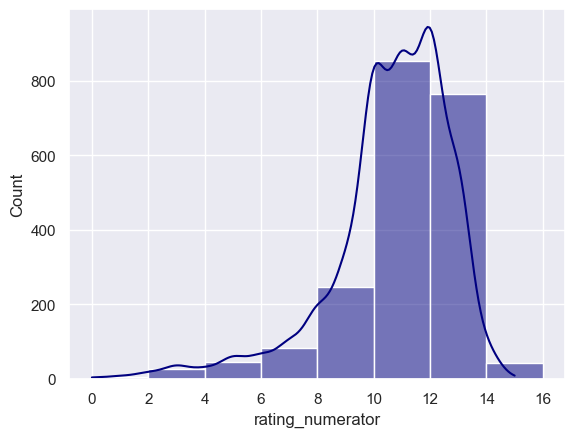

In [684]:
# Aperçu de l'histograme de notes
sns.set(style="darkgrid")
sns.histplot(data=all_data.rating_numerator,color='navy', binwidth = 2, kde=True)

In [685]:
# Regroupement par année
group_an = all_data.groupby(all_data.date.dt.year)

In [686]:
# Note moyenne générale
print("Moyenne générale des notes : ",np.round(all_data.rating_numerator.mean(), 0).astype(int))
# plus grand que 10
print("Moyenne des notes > 10 : ", np.round(all_data[all_data.rating_numerator > 10].rating_numerator.mean(), 0))
# plus petit que 10
print("Moyenne des notes < 10 : ", np.round(all_data[all_data.rating_numerator < 10].rating_numerator.mean(), 0))

Moyenne générale des notes :  11
Moyenne des notes > 10 :  12.0
Moyenne des notes < 10 :  7.0


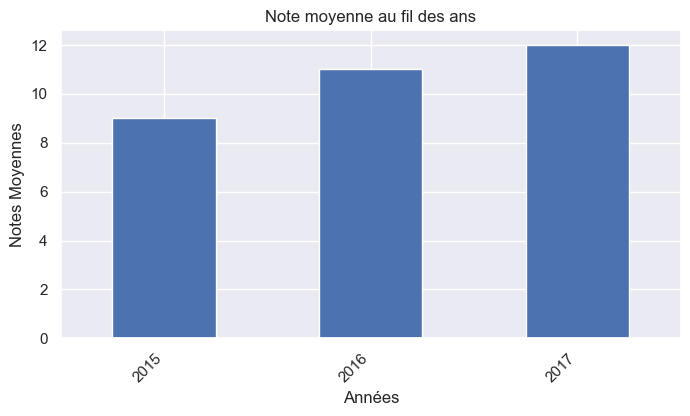

In [687]:
# Note à l'année
notes_an = np.round(group_an.rating_numerator.mean()).astype(int)

plt.figure(figsize=(8, 4))
notes_an.plot(kind='bar')
plt.title("Note moyenne au fil des ans")
plt.xlabel("Années")
plt.ylabel("Notes Moyennes")
plt.xticks(rotation=45, horizontalalignment='right');

#### Q#1:
* *98.0 %* des tweets sont postés à partir de l'application Tweeter pour *Iphone*,cela est dû au fait que les tweets eux-même proviennent du compte @WeRateDodgs. Donc le seul utilisateur de ce compte préfère utiliser l'appli sur son iphone pour poster ses tweets.

Text(0, 0.5, '  ')

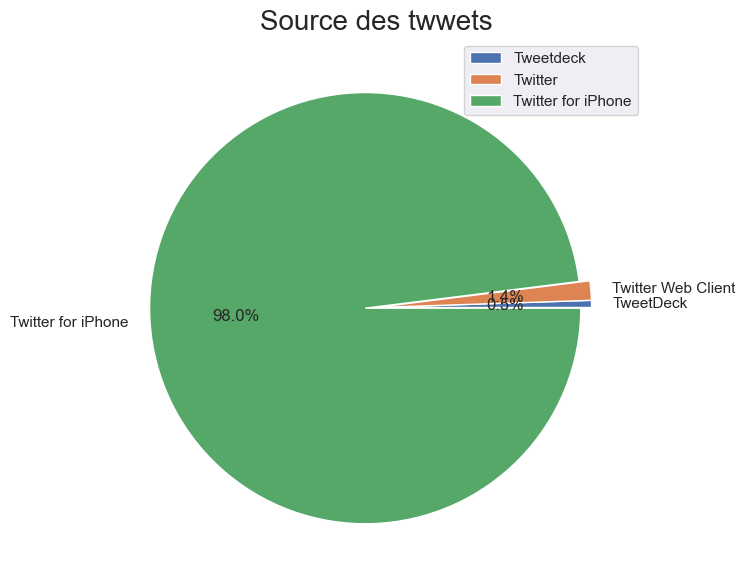

In [688]:
tweet_sources = all_data.groupby('source').count()[['tweet_id']]
tweet_sources.rename(columns={'tweet_id': 'source_count'}, inplace=True)
tweet_sources['source_percentage'] = tweet_sources.source_count / tweet_sources.source_count.sum() * 100
tweet_sources['source_percentage'].plot.pie(figsize=(7,7), autopct='%1.1f%%',
        explode=(0,0,0.05))
plt.title("Source des twwets", {'fontsize': 20})
plt.legend(["Tweetdeck", "Twitter", "Twitter for iPhone"])
plt.ylabel("  ")

#### Q#3:
* Pas besoin de chiffres ou de graphes pour savoir que *Charlie* est le nom de chien le plus utilisé, comme on le dit souvent "une image vaut mieux que milles mots". Même si dans *WordCloud* c'est les mots qui forment l'image, mdr... [ref](https://www.projectpro.io/recipes/create-word-cloud-python)

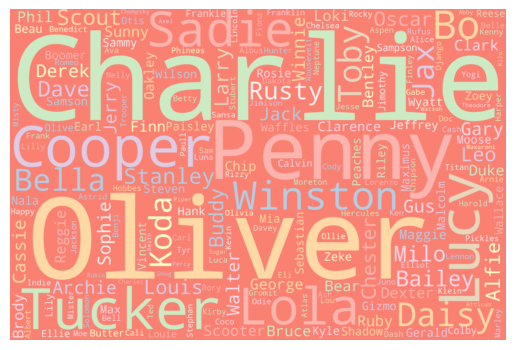

In [689]:
# Générer du text avec le nom des chiens
text = " ".join(name for name in list(all_data.name.dropna()))

# Générer un WordCloud sur le text précédent
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    max_font_size=1500,
    ).generate(text)

# sauvegrder l'image
word_cloud.to_file("img/Noms_de_chien_les_plus_populaires.png")

# Afficher le Word Cloud généré
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

#### Q#4:
* Le *Golden retriever* occupe la première place des races de chiens les plus fréquents sur les tweets.

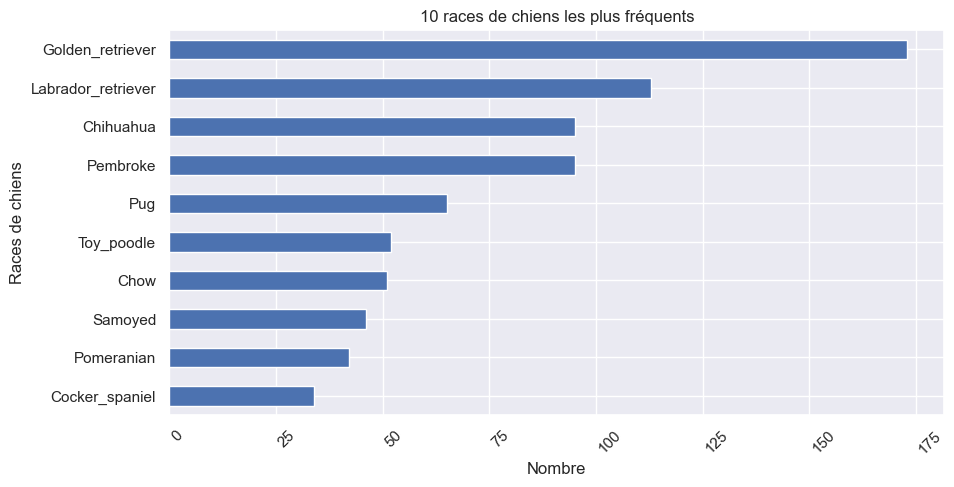

In [690]:
# filtrer le dataset
race_chien = all_data[all_data.race_chien.notna()]

# Graphe des dix races de chiens les plus fréquents
most_frequent = race_chien.race_chien.value_counts(ascending=True)[-10:]

plt.figure(figsize=(10, 5))
most_frequent.plot(kind='barh')
plt.title("10 races de chiens les plus fréquents")
plt.ylabel("Races de chiens")
plt.xlabel("Nombre")
plt.xticks(rotation=45, horizontalalignment='left');
plt.savefig("img/top_races_chiens")

#### Q#5: Les chiens les plus tweetés sont au niveau *pupper*.

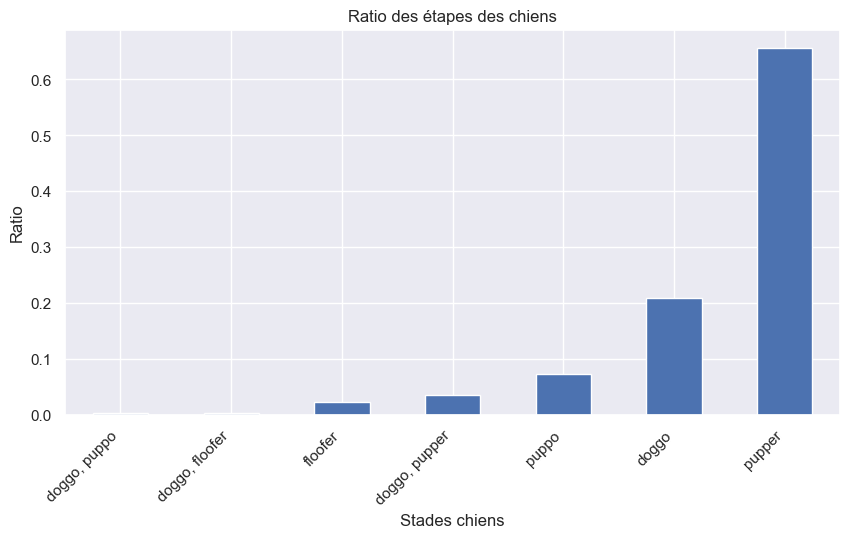

In [691]:
stades_chien = all_data[all_data.stade_chien.notna()]
stades_chien = stades_chien.stade_chien.value_counts(normalize=True, ascending=True)

plt.figure(figsize=(10, 5))
stades_chien.plot(kind='bar')
plt.title("Ratio des étapes des chiens")
plt.xlabel("Stades chiens")
plt.ylabel("Ratio")
plt.xticks(rotation=45, horizontalalignment='right');

#### Q#6:
* Le tweet le plus retweeté est celui de l'id *744234799360020481* à la date du *2016-06-18* et concerne un *Labrador_retriever*.
* *2016* est l'année où il y a eu le plus de Retweet (Rt).

In [692]:
# Tweet le plus retweeté 
all_data.loc[all_data.retweet_count.idxmax()]

tweet_id                                             744234799360020481
date                                          2016-06-18 18:26:18+00:00
source                                               Twitter for iPhone
text                  Here's a doggo realizing you can stand in a po...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
stade_chien                                                       doggo
single_rate                                                         1.3
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
race_chien                                           Labrador_retriever
retweeted                                                         False
favorited                                                         False
favorite_count                                                  

[Text(0.5, 1.0, 'Retweets les plus élevés au fil des ans')]

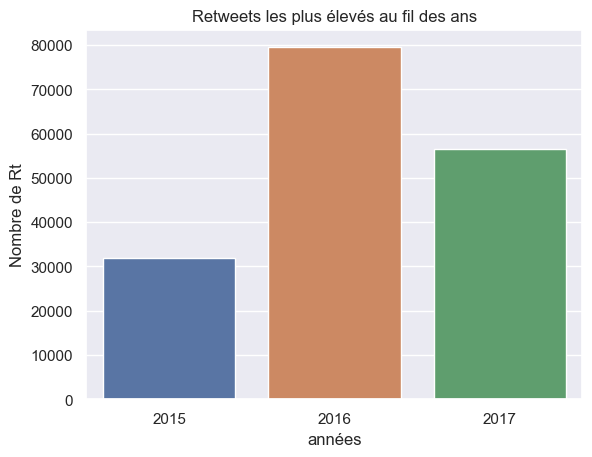

In [693]:
# Retweets sur l'année
highest_retweets = group_an.retweet_count.max()
df = pd.DataFrame(highest_retweets)
df.reset_index(inplace=True)
df.rename(columns={'retweet_count':'Nombre de Rt', 'date':'années'}, inplace=True)
sns.barplot(data=df, x="années", y="Nombre de Rt").set(title='Retweets les plus élevés au fil des ans')

#### Q#7:
* Le nombre de Retweets (Rt) augmente au fil du temps chaque années, même si *2017* présente une certaine irrégularité.

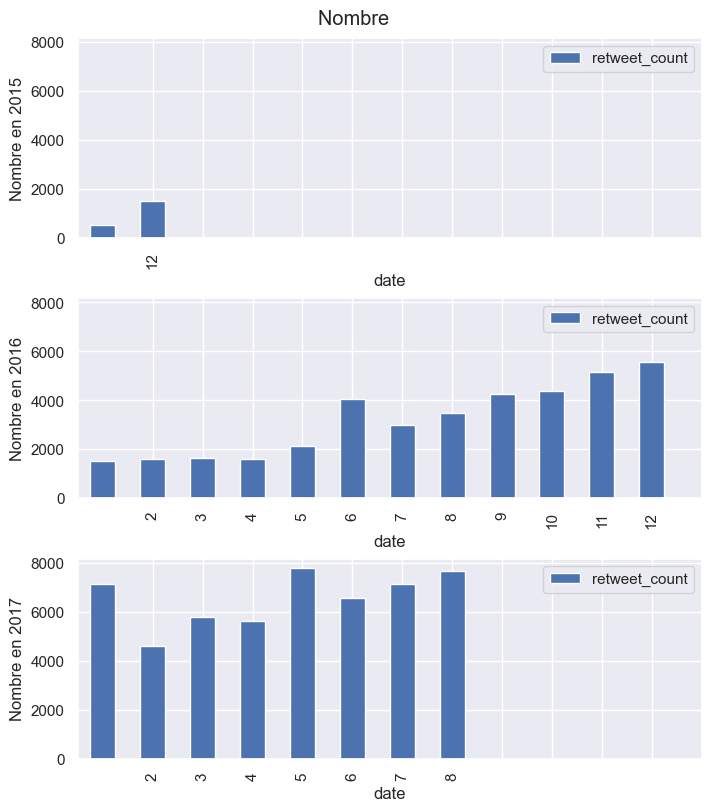

In [694]:
years_data = all_data.groupby([all_data.date.dt.year, all_data.date.dt.month]).agg({'retweet_count': 'mean'})

# Plotting
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(7, 8), constrained_layout=True, sharey=True)
years_data.xs(2015).plot(kind='bar', ax=axis[0])
years_data.xs(2016).plot(kind='bar', ax=axis[1])
years_data.xs(2017).plot(kind='bar', ax=axis[2])

axis[0].set_ylabel('Nombre en 2015')
axis[1].set_ylabel('Nombre en 2016')
axis[2].set_ylabel('Nombre en 2017')

plt.setp(axis, xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]);
plt.suptitle("Nombre ");

#### Q#8:
* Chien le mieux aimé est celui illustré dans le tweet ayant pour id 822872901745569793 à la date du 2017-01-21. Il est de race *Lakeland Terrier*, de niveau *pupo* et ce présente sur cette [image](https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg).
* Voici ce qui a été dit dans ce fameux tweet : "*Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 .*". 
* Malheureusement on connait pas nom !

In [695]:
# Chien le mieux aimé
pd.DataFrame(all_data.loc[all_data.favorite_count.idxmax()])

,329
tweet_id,822872901745569793
date,2017-01-21 18:26:02+00:00
source,Twitter for iPhone
text,Here's a super supportive puppo participating ...
rating_numerator,13
rating_denominator,10
name,NaN
stade_chien,puppo
single_rate,1.3
jpg_url,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg


In [696]:
# Contenu du tweet
print("Contenu du tweet : ",all_data.loc[all_data.favorite_count.idxmax()].text)

Contenu du tweet :  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 .


#### Q#9:
* Sur *2071* tweets où les langues ont été reconnues *2065* sont écrites en *Anglais*. Ce qui montre que montre que l'utilisateur du compte est soit originaire d'un pays anglophone soit il veut cibler plus de public avec ses tweets puisque l'anglais est la langue la plus parlé au monde.

In [697]:
tweet_lang = all_data[all_data.langue.notna()]
tweet_lang = tweet_lang.langue.value_counts(ascending=True)
pd.DataFrame(tweet_lang)

,langue
Basque,1
Roumain,1
Estonien,1
Néerlandais,3
Anglais,2065


### Visualization

#### Bonus (Word Cloud avec les Tweets)

In [698]:
# D'abord créer une liste avec tous les mots qui ont été tweetés dans notre DataFrame.
tweets = np.array(all_data.text)
my_list = []
for tweet in tweets:
    my_list.append(tweet.replace("\n",""))

In [699]:
# Ensuite télécharger une image d'une empreinte de patte sur Internet pour l'utiliser comme modèle de réprsentation
# des tweet avec wordcloud.
mask = np.array(Image.open(requests.get('https://clipartix.com/wp-content/uploads/2016/06/Dog-bone-pink-print-dog-paw-print-transparent-background-paw-print-pink-clipart.jpg', stream=True).raw))
text = my_list
def gen_wc(text, mask):
    word_cloud = WordCloud(width = 500, height = 500, background_color='white', mask=mask).generate(str(text))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='red')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

Ce script utilisé ci-dessus a été inspiré de ce [blog](https://blog.goodaudience.com/how-to-generate-a-word-cloud-of-any-shape-in-python-7bce27a55f6e) à propos de "*Comment générer un nuage de mots de n'importe quelle forme en Python*".

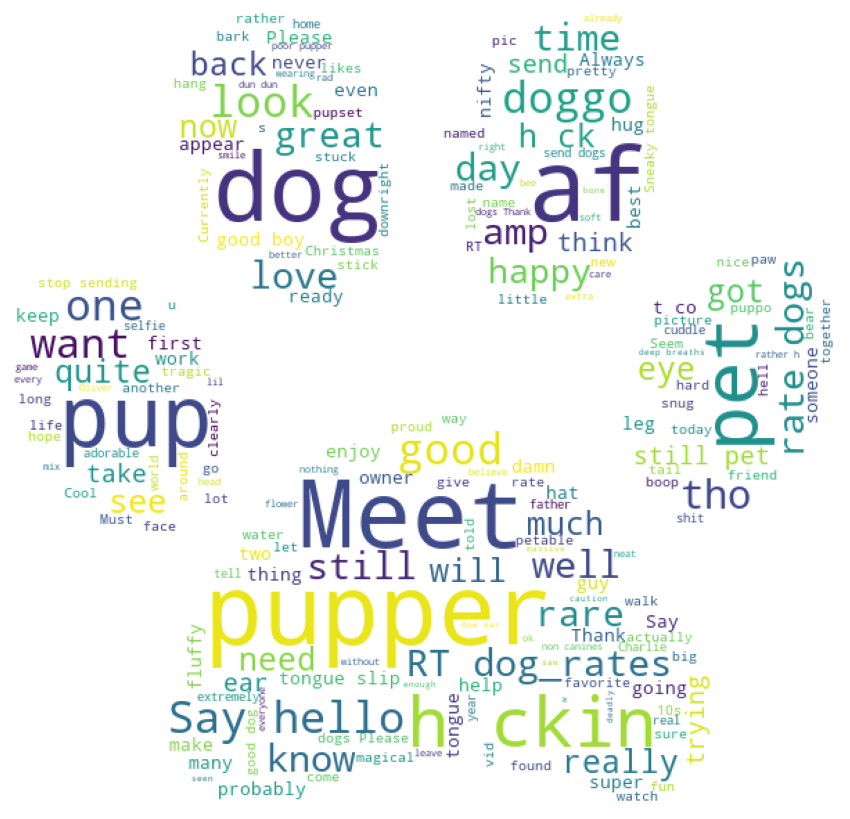

In [700]:
gen_wc(text, mask)

![gif-minion.png](img/gif-minions.gif)

Référence : [B.ALEMU](https://www.kaggle.com/betizazualemu)

<center><h1><strong>Auteur</strong></h1></center>

![author.png](img/Rooni2.png)

*`Nom : `* **`DIATTA`**  <br>
*`Prénom  :`* **`Arona Ben Cherif`** <br>
*`Niveau : `* **`Master 2 | Statistiques et Informatique Décisionnelle (UADB)`**  <br>
*`Nom de classe : `* **`ARONA_ADND`** <br>
*`Promotion : `* **`Cohorte 2 ALX-Udacity`** <br>
*`Nom de classe : `* **`ARONA_ADND`** <br>
*`Programme : `* **`Nanodegree d'analyste de données`** <br>